# TTM4133- User Positioning and Cellular Coverage
This lab consists of a single cell communication network with transmitting source i.e. base station (BS) located at center along with static user nodes and a mobile vehicular user node traversing across the coverage region of the cell. We will study the network coverage and received signal at different users in order to understand the coverage behavior of the cell in question. The insights gained will help us in choosing a set of parameters suitable for providing best possible coverage to all the users in the network topology. <br>
The scope of the lab includes the following goals in order to understand the coverage of a BS in cellular environments:
- Understand the basics of cellular coverage and associated parameters with regards to coverage for users (RSRP, RSRQ, and, SINR)
- Study the impact of changing different cellular topology parameters and clutter on (RSRP, RSRQ, and, SINR)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Introduction
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
A cellular environment consists of a single or multiple transmit antennas mounted on base station (BS) with varied coverage across an area determined by the type of antenna. In this lab, we will consider an omni-directional (provides equal coverage in all directions) antenna which provides an approximate coverage in a circular region as shown in topology diagram (Fig. 1). The users with cellular devices can be either static (not moving) or mobile (walking, vehicle movement) in the provided cell. The mobile user is moving along a fixed trajectory (**A→ B → C → D → E**) to experience differentiated cellular coverage in different cellular zones as per proximity to the BS. We will analyze the performance of different cellular users during the simulations by observing the following parameters:

1) Approximate Coverage Radius (meters)
2) BS Transmit Power Level (dBm)
3) Cellular Environment Type (urban\rural)

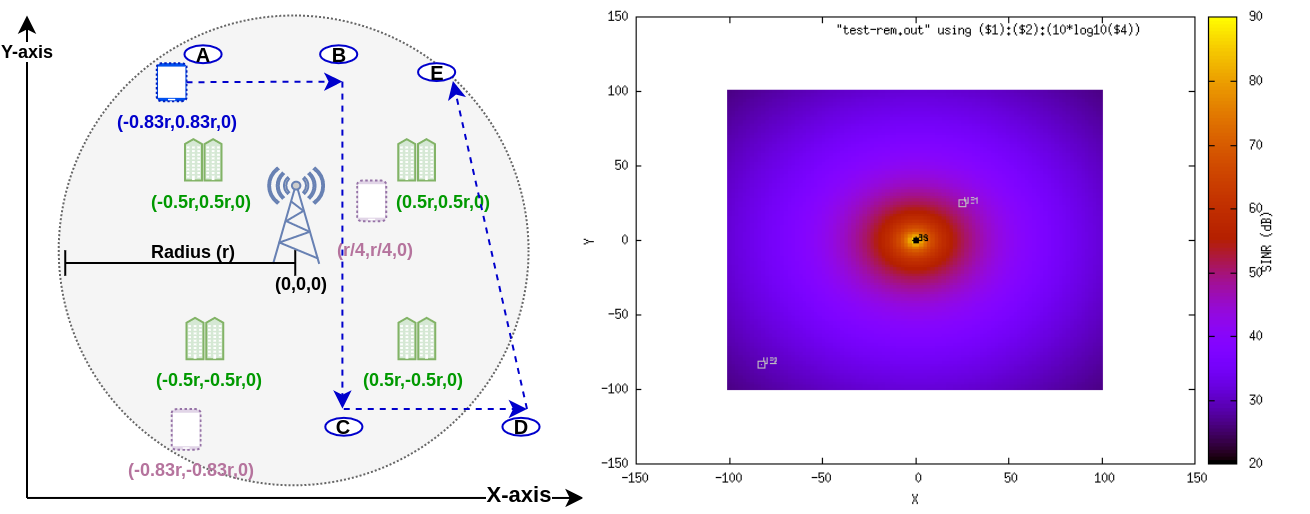 
<center>
    <b>Figure. 1: Network Topology and Radio Coverage Map.</b>
</center>

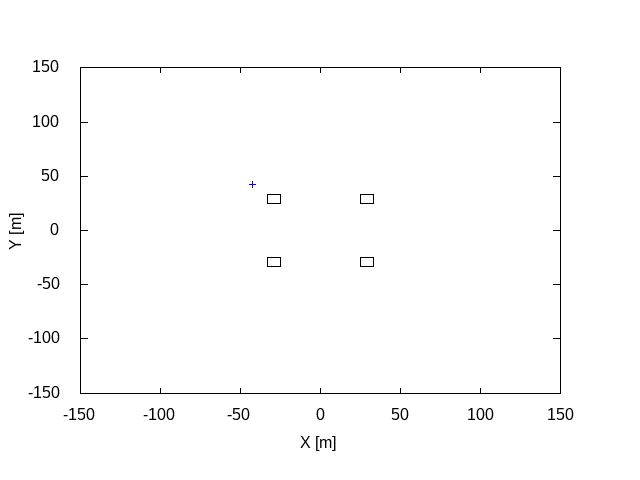 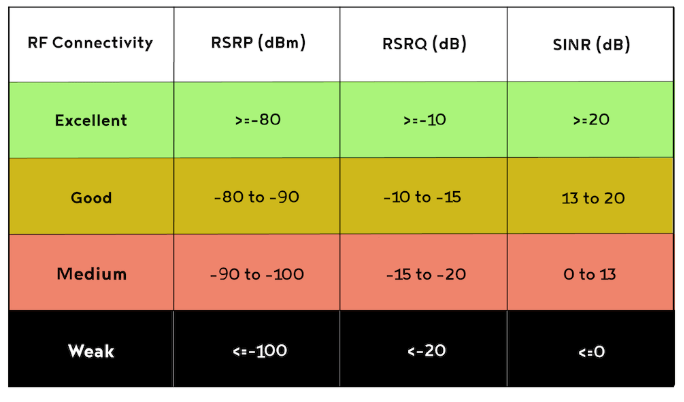
<center>
    <b>Figure. 2: Radio Coverage KPIs Performance Ranges.</b>
</center>
The coverage radius and BS power level will help in controlling the coverage area, whereas, cellular environment will be used to depict the behavior in an urban or rural environment with and without the presence of clutter. We will consider three key performance indicators (KPIs); Reference Signal Received Power (RSRP) (measured in dBm), Reference Signal Received Quality (RSRQ) (measured in dB), and, Signal-to-Interference-Noise Ratio (SINR) (measured in dB) to measure the performance of cellular network coverage for the users. A short depiction of signal quality with respect to these KPIs is shown in Fig. 2. <br>

# Parameters
We will use the following parameters to help run different simulations in order to gather and visualize the generated results:
- <u>enbDist</u> --> To set UE positioning
- <u>eNBTxPowerDbm</u> -> To set eNB transmit power
- <u>enablebuilding</u> -> To enable buildings in the cellular environment
- <u>enablersrp</u> -> To collect RSRP and RSRQ from the simulation
- <u>enablesinrenb</u> -> To collect SINR from the simulation
- <u>enableInstTput</u> -> To collect instantaneous throughput from the simulation


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 2. Running a Simulation and Performance Analysis
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Following steps will help us in precise interaction with the ns-3 script in order to alter different simulation parameters and obtain results upon completion. The results will be viewed in different cells in the notebook in order to visualize the performance of the simulation runs. The steps can be repeated with similar code snippets in order to answer different questions in the lab.

## 2.1 Running the initialization script
This script is responsible for the initialization of the simulation design using SEM and the specification of different parameters for the considered network topology implemented in ns-3. The expected outcome is the generation of databases with collected results to be visualized later on. We pass the default values of 40 and 300 for Tx power and coverage radius respectively as follows:<br>
**%run -i 'init.py' arg1 arg2 ...**

In [ ]:
%run -i 'init.py' 40 300 False

## 1.2 Query and filter simulation results
The results from the sem simulation framework are queried and transferred to python for per-processing by defining a set of parameters and using the same simulation campaign that was utilized during the simulation process.

In [ ]:
params_rsrp = {
    'eNBTxPowerDbm': 40,
    'enbDist': 300,
    'enablebuilding': False,
    'enablersrp': True,

}

params_snr = {
    'eNBTxPowerDbm': 40,
    'enbDist': 300,
    'enablebuilding': False,
    'enablesinrenb': True,
}
params_flow = {
    'eNBTxPowerDbm': 40,
    'enbDist': 300,
    'enablebuilding': False,
    'enableInstTput': True,
}

result_rsrp = campaign.db.get_complete_results(params=params_rsrp)
result_snr = campaign1.db.get_complete_results(params=params_snr)
result_flow = campaign2.db.get_complete_results(params=params_flow)

print("There are %s results in the database\n" % len(list(result_rsrp)))
print("There are %s results in the database\n" % len(list(result_snr)))
print("There are %s results in the database\n" % len(list(result_flow)))



## 1.3 Running the data pre-processing script
This script is responsible for the parsing of simulation data collected during the simulation runs. The expected outcome is the generation of python dataframes with values of RSRP, RSRQ, SINR and throughput, delay for different parameters. The dataframes are generated with the following format for the rsrp, sinr and flow related parameters. <br>

In [ ]:
%run -i 'data-pre.py'
# dataframes for visualizing respective results
# res for RSRP and RSRQ
# res1 for SINR
# res2 for flows (throughput)

## 1.4 Simulation Results

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(40,10))
snsp1 = sns.lineplot(ax=axes[0,0], data=res, x='time', y='rsrp', hue='uid', ci=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Reference Signal Received Power (RSRP) (dBm)')

snsp2 = sns.lineplot(ax=axes[0,1], data=res, x='time', y='rsrq', hue='uid', ci=None)
snsp2.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp2.set( xlabel='Simulation Time (s)', ylabel='Reference Signal Received Quality (RSRQ) (dB)')

snsp3 =  sns.lineplot(ax=axes[0,2],data=res1, x='time', y='snr', hue='uid', ci=None)
snsp3.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp3.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')

snsp1 = sns.boxplot(ax=axes[1,0], data=res, x='uid', y='rsrp')
snsp1.set( xlabel='Users (uxy, where, x=cellid, y=rnti)', ylabel='Reference Signal Received Power (RSRP) (dBm)')

snsp2 = sns.boxplot(ax=axes[1,1], data=res, x='uid', y='rsrq')
snsp2.set( xlabel='Users (uxy, where, x=cellid, y=rnti)', ylabel='Reference Signal Received Quality (RSRQ) (dBm)')

snsp3 =  sns.boxplot(ax=axes[1,2],data=res1, x='uid', y='snr')
snsp3.set( xlabel='Users (uxy, where, x=cellid, y=rnti)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')

## 2. Problem Statement
The topology provides a sample setup to study the impact of distance, transmitted power and user positioning in determining the received signal power at different users in the topology. The signal is transmitted followed by wireless propagation through the cellular channel and reception at the receiver. Different forms of propagation losses are incurred for different users in the coverage area of the cell based on proximity to the transmitter (BS), propagation path, presence of obstacles (buildings in current topology), and, type of connection established (line-of-sight vs non-line-of-sight). We will utilize two different types of propagation models based on the value of <u>enablebuilding</u> variable, namely,  **HybridBuildingsPropagationLossModel**, and, **ThreeLogDistancePropagationLossModel**. Moreover, the placement of users around BS is controlled using the <u>enbDist</u> variable. The comparative analysis of these parameters allow us to understand the key factors determining the coverage behavior of cells in a cellular network environment. <br>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#1: Impact of User positioning and coverage in cellular environment (Rural Without Buildings)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
This task involves the simulation of a sample scenario with a set of relevant parameters in the provided topology. The students are expected to generate the mentioned graphs by analyzing the results produced from the ns3 script (available at <u>repos/sem-example/ns-3/scratch/task2.cc</u>). The objectives are to correlate the behavior of RSRP, RSRQ and SINR values with the positioning of different users in the coverage area.<br>
Simulate through the following sets of parameters and identify the best and worst performing parameters in terms of coverage KPIs:

## Scenario 1
- **TxPower = 40dBm, Distance = 500m, Buildings = False**

## Scenario 2
- **TxPower = 45dBm, Distance = 500m, Buildings = False**

## Scenario 3
- **TxPower = 50dBm, Distance = 500m, Buildings = False**

## Q1. What is the best possible combination of parameters (Txpower, Distance) with respect to the coverage KPIs?
(Enter the input as (units dBm and meters): 

## Q2. What is the worst possible combination of parameters (Txpower, Distance) with respect to the coverage KPIs?
(Enter the input as (units dBm and meters):  

## Q3. What do you think will happen if the mobile user enters a region with no cellular coverage?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#2: Impact of changing propagation environment (Urban with Buildings)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
This task involves the study of altering coverage behavior of BS using the transmit power and maximum area of coverage along with 4 buildings as shown in Fig. 1. The initialization script must be run with the following sets of variable values and performance compared with the baseline performance from Task#1.

## Scenario 1
- **TxPower = 40dBm, Distance = 500m, Buildings = True**

## Scenario 2
- **TxPower = 45dBm, Distance = 500m, Buildings = True**

## Scenario 3
- **TxPower = 50dBm, Distance = 500m, Buildings = True**

## Q1. What is the impact of introducing an urban environment (with the introduction of buildings) for the considered cellular network?
(Is it performing better or worst for different parameter values? Justify in either case?)

## Q2. Line of sight (LOS) is a direct communication link between transmitting and receiving nodes. Whereas, Non line of sight (NLOS) is indirect link through various phenomena during signal propagation. Base on the positioning of the users shown in Fig. 1, what type of link is being established for each user in the topology?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task#3: Impact of propagation environment on Traffic Flows
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
This task involves the study the downlink (DL) throughput performance of different users in the network due to the positioning and variability in the clutter of the propagation environment. Following different scenarios will be simulated in order to achieve this objective:

## Scenario 1
- **TxPower = 40dBm, Distance = 600m, Buildings = False**

## Scenario 2
- **TxPower = 40dBm, Distance = 600m, Buildings = True**

## Scenario 3
- **TxPower = 40dBm, Distance = 2000m, Buildings = False**

## Scenario 4
- **TxPower = 40dBm, Distance = 2000m, Buildings = True**

## Q1. Which user has the most stable connection in terms of experienced throughput performance? What is the impact of buildings on the performance of mobile user?

## Q2. What is the impact of placing users away from the cell center on throughput performance for different users in the topology? How can the movement of mobile user be correlated with the experienced throughput?

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------